In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv('/content/telco_churn.csv')
print(data.head())

   Unnamed: 0  customerID  gender SeniorCitizen Partner Dependents  tenure  \
0           0  7590-VHVEG  Female         False    True      False       1   
1           1  5575-GNVDE    Male         False   False      False      34   
2           2  3668-QPYBK    Male         False   False      False       2   
3           3  7795-CFOCW    Male         False   False      False      45   
4           4  9237-HQITU  Female         False   False      False       2   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0        False           NaN             DSL  ...            False   
1         True         False             DSL  ...             True   
2         True         False             DSL  ...            False   
3        False           NaN             DSL  ...             True   
4         True         False     Fiber optic  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False       

In [3]:
print(data.tail(7))

      Unnamed: 0  customerID  gender SeniorCitizen Partner Dependents  tenure  \
5036        2036  7750-EYXWZ  Female             0      No         No      12   
5037        2037  2569-WGERO  Female             0      No         No      72   
5038        2038  6840-RESVB    Male             0     Yes        Yes      24   
5039        2039  2234-XADUH  Female             0     Yes        Yes      72   
5040        2040  4801-JZAZL  Female             0     Yes        Yes      11   
5041        2041  8361-LTMKD    Male             1     Yes         No       4   
5042        2042  3186-AJIEK    Male             0      No         No      66   

     PhoneService     MultipleLines InternetService  ...     DeviceProtection  \
5036           No  No phone service             DSL  ...                  Yes   
5037          Yes                No              No  ...  No internet service   
5038          Yes               Yes             DSL  ...                  Yes   
5039          Yes          

In [4]:
data.describe()

,Unnamed: 0,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,1305.651993,32.576641,65.090214
std,801.484415,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,630.000000,9.000000,35.775000
50%,1260.000000,29.000000,70.550003
75%,1890.500000,56.000000,90.050003
max,2999.000000,72.000000,118.650002


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Unnamed: 0', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


In [14]:
data = data.dropna()  # Handle missing values
# Encode categorical features
for col in data.select_dtypes(include=['object']):
    data[col] = LabelEncoder().fit_transform(data[col])

# Split features and label
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data, getting DataFrame versions first
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store the original indices of the test set BEFORE scaling
test_customer_indices = X_test_df.index

scaler = StandardScaler()
# Now scale the data, which converts it to NumPy arrays
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:49:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

roc_rf = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')
roc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print(f'Random Forest ROC AUC: {roc_rf}')
print(f'XGBoost ROC AUC: {roc_xgb}')

Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       288
           1       0.85      0.91      0.88       294
           2       0.74      0.59      0.66       142
           3       0.67      0.53      0.59       101

    accuracy                           0.80       825
   macro avg       0.77      0.73      0.75       825
weighted avg       0.80      0.80      0.80       825

XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       288
           1       0.85      0.86      0.86       294
           2       0.70      0.63      0.66       142
           3       0.58      0.54      0.56       101

    accuracy                           0.79       825
   macro avg       0.74      0.73      0.73       825
weighted avg       0.78      0.79      0.78       825

Random Forest ROC AUC: 0.9551167475871151
XGBoost ROC AUC: 0.9454881910354468


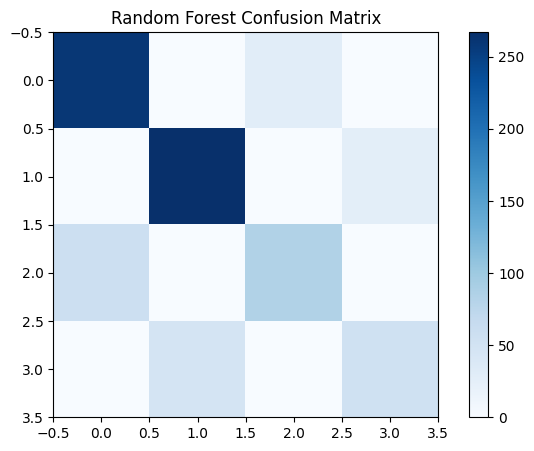

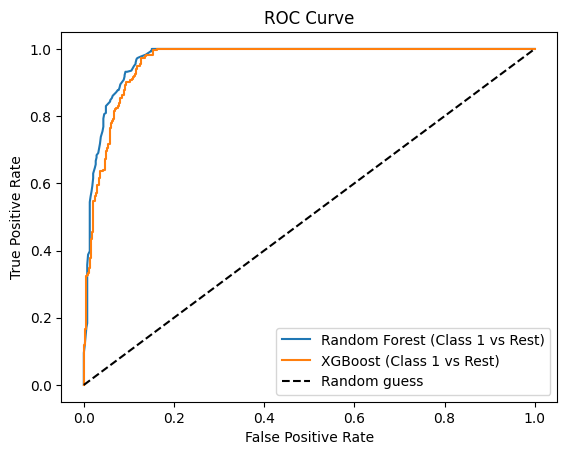

In [12]:
plt.figure(figsize=(8,5))
conf_rf = confusion_matrix(y_test, y_pred_rf)
plt.title('Random Forest Confusion Matrix')
plt.imshow(conf_rf, cmap="Blues")
plt.colorbar()
plt.show()

# Define the positive class for the ROC curve (e.g., class with index 1)
# This assumes class 1 is the 'positive' class of interest for binary ROC plotting
positive_class_index = 1

# Binarize y_test for the chosen positive class
y_test_binary = (y_test == positive_class_index).astype(int)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, rf.predict_proba(X_test)[:, positive_class_index])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (Class {positive_class_index} vs Rest)')

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_binary, xgb.predict_proba(X_test)[:, positive_class_index])
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (Class {positive_class_index} vs Rest)')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
churn_prob = rf.predict_proba(X_test)[:,1]
# Use the stored indices and the correct column name 'customerID'
results = pd.DataFrame({'customer_id': data.loc[test_customer_indices, 'customerID'], 'churn_probability': churn_prob})
results.to_csv('/content/telco_churn.csv', index=False)